In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid",
        color_codes=True,
        context="notebook",
        rc={"grid.linewidth":0.25,"grid.color":"grey","grid.linestyle":"-"},
        font_scale=1,
        palette="husl")

plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (12,10)


In [2]:
# Cargamos el DataFrame
df = pd.read_csv('../data/processed/df.csv')

df_full = df.dropna(subset=['edu_lvl','etnicity'])

df_full.to_csv('../data/processed/df_full.csv',index=True)

df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11872 entries, 18307 to 30178
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month        11872 non-null  object 
 1   gender       11872 non-null  object 
 2   years        11872 non-null  float64
 3   edu_lvl      11872 non-null  object 
 4   etnicity     11872 non-null  object 
 5   main_source  11872 non-null  float64
 6   total        11872 non-null  float64
dtypes: float64(3), object(4)
memory usage: 742.0+ KB


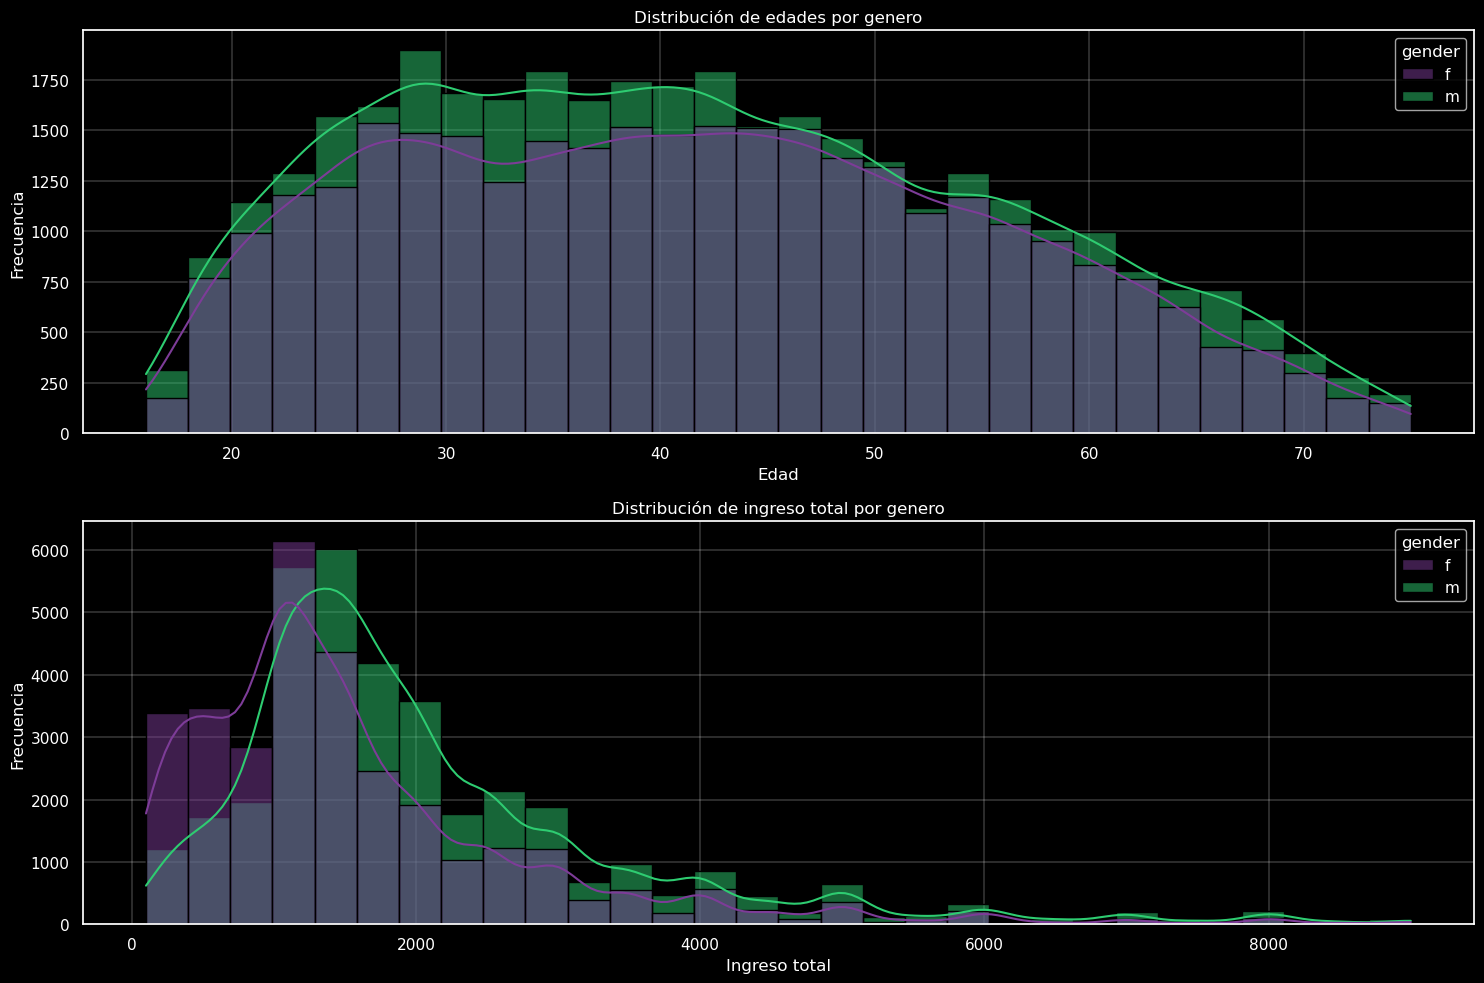

In [3]:
# Histplot: Distribución de edades por gender
fig, ax = plt.subplots(2,figsize=(15,10))

sns.histplot(data=df,x="years",hue="gender",ax=ax[0],
             kde=True,bins=30,
             legend=True,multiple="layer",edgecolor='black',
             palette={'m':'#2ECC71','f':'#7D3C98'})
ax[0].set_title('Distribución de edades por genero')
ax[0].set_xlabel('Edad')
ax[0].set_ylabel('Frecuencia')

sns.histplot(data=df,x="total",hue="gender",ax=ax[1],
             kde=True,bins=30,
             legend=True,multiple="layer",edgecolor='black',
             palette={'m':'#2ECC71','f':'#7D3C98'})
ax[1].set_title('Distribución de ingreso total por genero')
ax[1].set_xlabel('Ingreso total')
ax[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

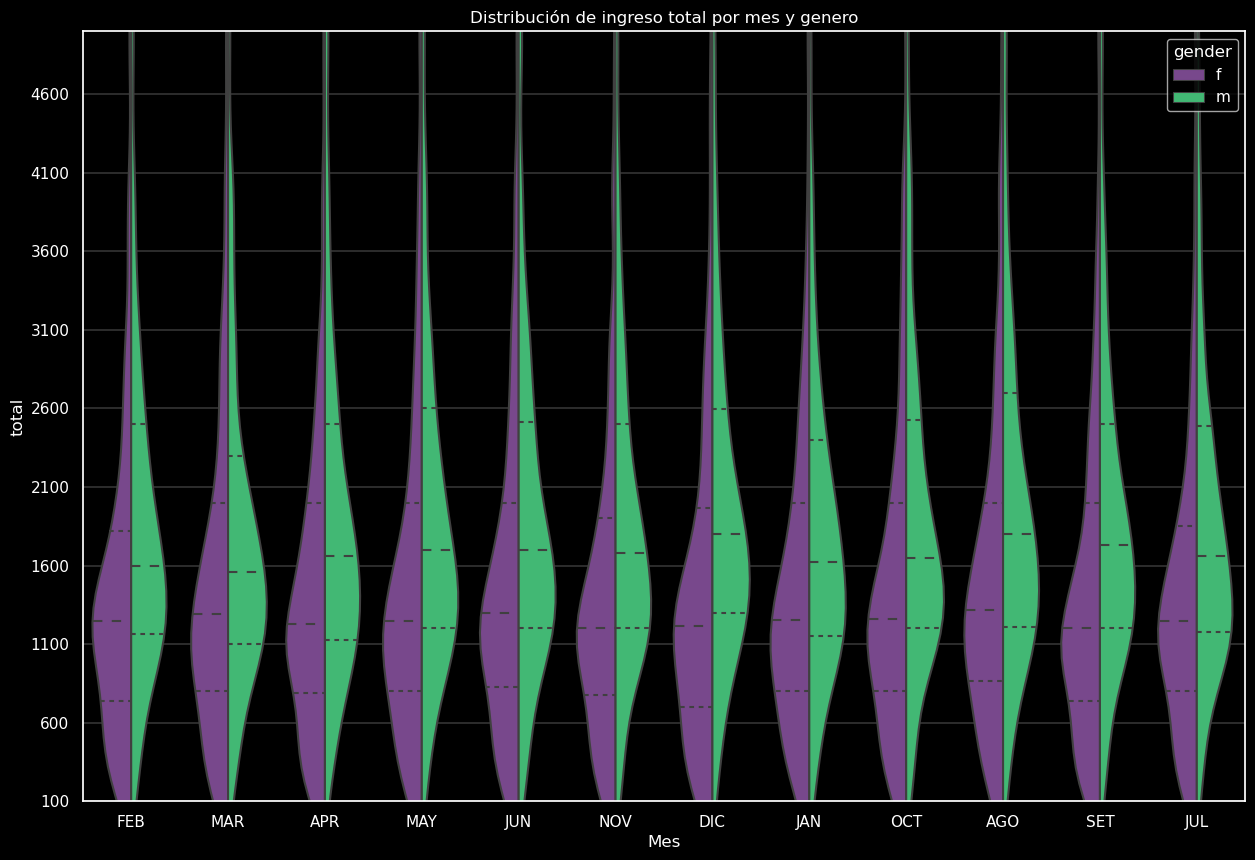

In [4]:
# violinplot: Distribucion de ingreso total por mes y gender
fig, ax = plt.subplots(figsize=(15,10))
sns.violinplot(data=df,x="month",y="total",hue="gender",
               split=True,inner="quart",ax=ax,
               palette={'m':'#2ECC71','f':'#7D3C98'})
ax.set_title('Distribución de ingreso total por mes y genero')
ax.set_xlabel('Mes')
y_ticks = np.arange(100, 5000, step=500)
plt.yticks(y_ticks)
ax.set_ylim([100, 5000])  # Estableciendo los límites del eje y
ax.set_ylabel('total')
plt.show()